# Generate figures for demonstraing py-lmd's capabilities

In [5]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from matplotlib.colors import ListedColormap
import matplotlib as mpl

regular_viper_colors = ["#b3262a", "#2f559a", "#e46425", "#5aadc5", "#f5db12"]
light_viper_colors = ["#b3262a", "#d68587", "#2f559a", "#8299c4"]

mpl.rcParams["axes.prop_cycle"] = mpl.cycler(color=regular_viper_colors)
regular_viper_cm = ListedColormap(regular_viper_colors)
regular_viper_cm.set_under("white")
light_viper_cm = ListedColormap(light_viper_colors)
light_viper_cm.set_under("white")

figure_output = "../../images"

from lmd.lib import Collection, SegmentationLoader
from lmd import tools
from PIL import Image

from lmd._utils import _download_segmentation_example_file

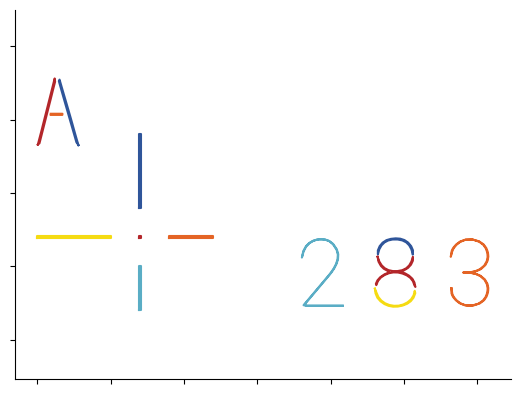

In [3]:
calibration = np.array([[0, 0], [0, 100], [50, 50]])

my_collection = Collection(calibration_points=calibration)
my_collection.join(tools.makeCross([20, 20], [50, 30, 30, 50], 1, 10))
my_collection.join(tools.glyph("A", offset=(-50, 130), multiplier=5))
my_collection.join(tools.text("283", offset=np.array([130, 20]), multiplier=5))

for shape in my_collection.shapes:
    points = shape.points @ my_collection.orientation_transform * 1
    plt.plot(points[:, 0], points[:, 1])

# remove top and right spine
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.axis("equal")

# remove tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# save as eps
plt.savefig(os.path.join(figure_output, "calibration.eps"), format="eps", dpi=300)

In [6]:
image_path = _download_segmentation_example_file()
im = Image.open(image_path)
segmentation = np.array(im).astype(np.uint32)

labels = np.unique(segmentation)
labels = labels[labels != 0]

rng = np.random.default_rng()
rng.shuffle(labels)

new_label = np.zeros(labels.shape[0] + 1, dtype=labels.dtype)
new_label[1:] = labels

# lookup segmentation values in new_label
segmentation = new_label[segmentation]

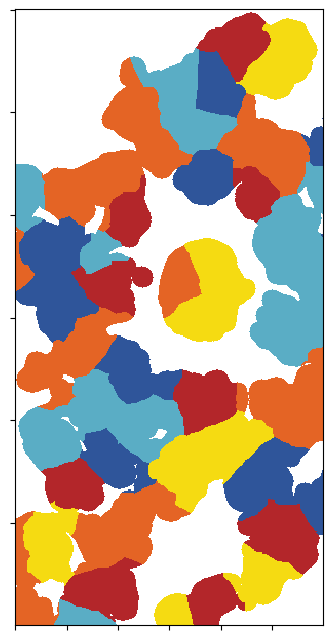

In [7]:
fig, ax = plt.subplots(figsize=(4, 8))
ax.imshow(segmentation[:600, 500:800], cmap=regular_viper_cm, interpolation="nearest", vmin=1)

# remove tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.savefig(os.path.join(figure_output, "segmentation.eps"), format="eps", dpi=300)

Processing cell sets in serial


/Users/sophia/mambaforge/envs/py-lmd/lib/python3.12/site-packages/numba/typed/typeddict.py:39: NumbaTypeSafetyWarning: unsafe cast from int64 to uint32. Precision may be lost.
  return d[key]
/Users/sophia/Documents/GitHub/py-lmd/src/lmd/lib.py:892: UserWarning: Class 0 is not a valid class and was removed from the cell set
  collections.append(self.generate_cutting_data(i, cell_set))


Processing cell sets in serial


/Users/sophia/Documents/GitHub/py-lmd/src/lmd/lib.py:892: UserWarning: Class 0 is not a valid class and was removed from the cell set
  collections.append(self.generate_cutting_data(i, cell_set))


Processing cell sets in serial


/Users/sophia/Documents/GitHub/py-lmd/src/lmd/lib.py:892: UserWarning: Class 0 is not a valid class and was removed from the cell set
  collections.append(self.generate_cutting_data(i, cell_set))


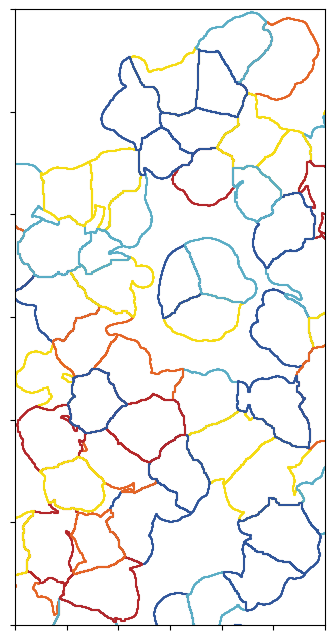

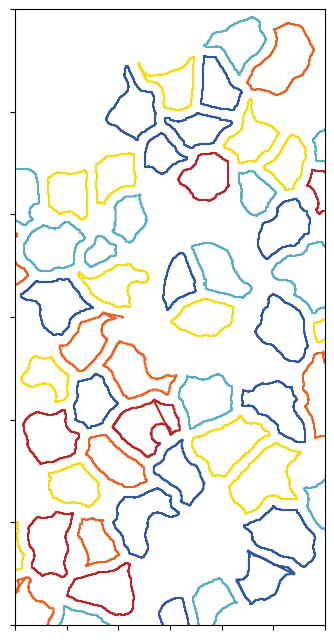

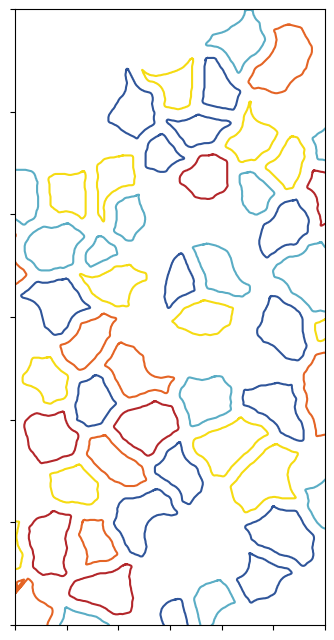

In [8]:
all_classes = np.unique(segmentation)

cell_sets = [{"classes": all_classes, "well": "A1"}]

calibration_points = np.array([[0, 0], [0, 1000], [1000, 1000]])

config_list = [
    {
        "orientation_transform": np.array([[0, -1], [1, 0]]),
        "join_intersecting": False,
        "shape_erosion": 0,
        "binary_smoothing": 0,
        "convolution_smoothing": 1,
        "rdp": 0.5,
    },
    {
        "orientation_transform": np.array([[0, -1], [1, 0]]),
        "join_intersecting": False,
        "shape_erosion": 5,
        "binary_smoothing": 4,
        "convolution_smoothing": 1,
        "rdp": 0.5,
    },
    {
        "orientation_transform": np.array([[0, -1], [1, 0]]),
        "join_intersecting": False,
        "shape_erosion": 6,
        "shape_dilation": 0,
        "binary_smoothing": 10,
        "convolution_smoothing": 10,
        "rdp": 0.5,
    },
]

for i, loader_config in enumerate(config_list):
    sl = SegmentationLoader(config=loader_config)
    shape_collection = sl(segmentation, cell_sets, calibration_points)

    fig, ax = plt.subplots(figsize=(4, 8))

    for shape in shape_collection.shapes:
        points = shape.points @ shape_collection.orientation_transform * 1
        ax.plot(points[:, 0], points[:, 1])

    ax.set_xlim(500, 800)
    ax.set_ylim(-600, 0)

    ax.set_yticklabels([])
    ax.set_xticklabels([])

    plt.savefig(os.path.join(figure_output, f"segmentation_{i}.eps"), format="eps", dpi=300)

Processing cell sets in serial


/Users/sophia/Documents/GitHub/py-lmd/src/lmd/lib.py:892: UserWarning: Class 0 is not a valid class and was removed from the cell set
  collections.append(self.generate_cutting_data(i, cell_set))


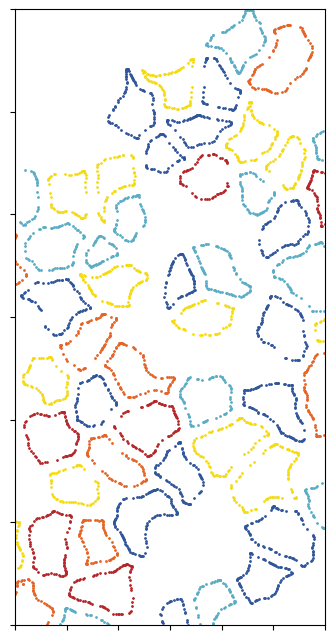

In [9]:
{
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "join_intersecting": False,
    "shape_erosion": 6,
    "shape_dilation": 0,
    "binary_smoothing": 10,
    "convolution_smoothing": 10,
    "rdp": 1,
}


sl = SegmentationLoader(config=loader_config)
shape_collection = sl(segmentation, cell_sets, calibration_points)

fig, ax = plt.subplots(figsize=(4, 8))

for shape in shape_collection.shapes:
    points = shape.points @ shape_collection.orientation_transform * 1
    # ax.plot(points[:,0],points[:,1])
    ax.scatter(points[:, 0], points[:, 1], s=1)

ax.set_xlim(500, 800)
ax.set_ylim(-600, 0)

ax.set_yticklabels([])
ax.set_xticklabels([])

plt.savefig(os.path.join(figure_output, "segmentation_3.eps"), format="eps", dpi=300)

In [10]:
segmentation_slice = segmentation[:600, 500:800]
segmentation_top = set(np.unique(segmentation_slice[:350])) - {0}
segmentation_bottom = set(np.unique(segmentation_slice[350:])) - {0}
segmentation_top = segmentation_top - segmentation_bottom
print(segmentation_top)
print(segmentation_bottom)

{np.uint32(129), np.uint32(3), np.uint32(133), np.uint32(11), np.uint32(139), np.uint32(145), np.uint32(147), np.uint32(148), np.uint32(22), np.uint32(157), np.uint32(31), np.uint32(164), np.uint32(166), np.uint32(169), np.uint32(172), np.uint32(52), np.uint32(61), np.uint32(190), np.uint32(64), np.uint32(73), np.uint32(76), np.uint32(82), np.uint32(84), np.uint32(87), np.uint32(88), np.uint32(89), np.uint32(106), np.uint32(112), np.uint32(113), np.uint32(114)}
{np.uint32(131), np.uint32(195), np.uint32(5), np.uint32(68), np.uint32(74), np.uint32(13), np.uint32(207), np.uint32(16), np.uint32(208), np.uint32(18), np.uint32(85), np.uint32(152), np.uint32(120), np.uint32(158), np.uint32(97), np.uint32(98), np.uint32(163), np.uint32(37), np.uint32(107), np.uint32(108), np.uint32(178), np.uint32(115), np.uint32(56), np.uint32(122), np.uint32(62), np.uint32(191)}


Processing cell sets in serial
Processing cell sets in serial


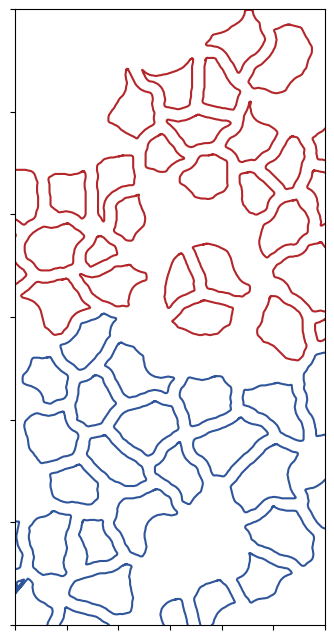

In [11]:
cell_sets = [{"classes": list(segmentation_top), "well": "A1"}]

calibration_points = np.array([[0, 0], [0, 1000], [1000, 1000]])

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "join_intersecting": False,
    "shape_erosion": 6,
    "shape_dilation": 0,
    "binary_smoothing": 10,
    "convolution_smoothing": 10,
    "poly_compression_factor": 10,
}

sl = SegmentationLoader(config=loader_config)
shape_collection = sl(segmentation, cell_sets, calibration_points)

# shape_collection.plot(fig_size = (10, 10))

fig, ax = plt.subplots(figsize=(4, 8))

for shape in shape_collection.shapes:
    points = shape.points @ shape_collection.orientation_transform * 1
    ax.plot(points[:, 0], points[:, 1], c=regular_viper_cm(0))

cell_sets = [{"classes": list(segmentation_bottom), "well": "A1"}]

calibration_points = np.array([[0, 0], [0, 1000], [1000, 1000]])

sl = SegmentationLoader(config=loader_config)
shape_collection = sl(segmentation, cell_sets, calibration_points)

# shape_collection.plot(fig_size = (10, 10))

for shape in shape_collection.shapes:
    points = shape.points @ shape_collection.orientation_transform * 1
    ax.plot(points[:, 0], points[:, 1], c=regular_viper_cm(1))


ax.set_xlim(500, 800)
ax.set_ylim(-600, 0)

ax.set_yticklabels([])
ax.set_xticklabels([])

plt.savefig(os.path.join(figure_output, "segmentation_4.eps"), format="eps", dpi=300)

In [13]:
# calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

# loader_config = {
#     'orientation_transform': np.array([[0, -1],[1, 0]]),
#     'join_intersecting': False,
#     'shape_erosion': 6,
#     'shape_dilation': 0,
#     'binary_smoothing': 10,
#     'convolution_smoothing': 10,
#     'path_optimization': 'hilbert',
#     'rdp':0.5,
#     'hilbert_p':10

# }


# cell_sets = [{"classes": list(segmentation_top), "well": "A1"}]
# sl = SegmentationLoader(config = loader_config)
# shape_collection = sl(segmentation,
#                     cell_sets,
#                     calibration_points)

# #shape_collection.plot(fig_size = (10, 10))

# fig, ax = plt.subplots(figsize=(4,8))

# center = []

# for shape in shape_collection.shapes:
#     points = shape.points @ shape_collection.orientation_transform * 1
#     center.append(np.mean(points, axis = 0))
#     ax.plot(points[:,0],points[:,1], c = light_viper_cm(1))

# center_transformed = sl.coords_lookup @ shape_collection.orientation_transform * 1
# ax.plot(center_transformed[:,0], center_transformed[:,1], c = light_viper_cm(0))

# cell_sets = [{"classes": list(segmentation_bottom), "well": "A1"}]
# sl = SegmentationLoader(config = loader_config)
# shape_collection = sl(segmentation,
#                     cell_sets,
#                     calibration_points)

# #shape_collection.plot(fig_size = (10, 10))

# center = []

# for shape in shape_collection.shapes:
#     points = shape.points @ shape_collection.orientation_transform * 1
#     center.append(np.mean(points, axis = 0))
#     ax.plot(points[:,0],points[:,1], c = light_viper_cm(3))

# center_transformed = sl.center @ shape_collection.orientation_transform * 1
# ax.plot(center_transformed[:,0], center_transformed[:,1], c = light_viper_cm(2))

# ax.set_xlim(500, 800)
# ax.set_ylim(-600, 0)

# ax.set_yticklabels([])
# ax.set_xticklabels([])

# plt.savefig(os.path.join(figure_output,f'segmentation_5.eps'), format='eps', dpi=300)
